Americas famous 5 bank stocks and analyse they progressed throughout the financial crisis all the way to early till May 15th 2020

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data,wb
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

to avoid bad handshakes(SSLerror),bypassing the verification.**DO NOT IN PRODUCTION**

In [2]:
import warnings
import contextlib

import requests
from urllib3.exceptions import InsecureRequestWarning


old_merge_environment_settings = requests.Session.merge_environment_settings

@contextlib.contextmanager
def no_ssl_verification():
    opened_adapters = set()

    def merge_environment_settings(self, url, proxies, stream, verify, cert):
        
        opened_adapters.add(self.get_adapter(url))

        settings = old_merge_environment_settings(self, url, proxies, stream, verify, cert)
        settings['verify'] = False

        return settings

    requests.Session.merge_environment_settings = merge_environment_settings

    try:
        with warnings.catch_warnings():
            warnings.simplefilter('ignore', InsecureRequestWarning)
            yield
    finally:
        requests.Session.merge_environment_settings = old_merge_environment_settings

        for adapter in opened_adapters:
            try:
                adapter.close()
            except:
                pass

Importing the data through DataReader; Data source is **YAHOO Finacial API**

In [3]:
start=datetime.datetime(2006,1,1) #start date
end=datetime.datetime.today() #End date

with no_ssl_verification():
    BAC =data.DataReader(name="BAC",data_source='yahoo',start=start,end=end)
    C=data.DataReader(name="C",data_source='yahoo',start=start,end=end)
    GS=data.DataReader(name="GS",data_source='yahoo',start=start,end=end)
    JPM=data.DataReader(name="JPM",data_source='yahoo',start=start,end=end)
    WFC=data.DataReader(name="WFC",data_source='yahoo',start=start,end=end)

In [5]:
bank_stocks=pd.concat([BAC,C,GS,JPM,WFC],keys=['Bank of America','CitiGroup','Goldman Sach','JP Morgan Chase','Wells Fargo Comp'],axis=1)
bank_stocks.columns.names=['Banks','Stock info']

Highest Closing and Adjusted Closing for each bank

In [50]:
bank_stocks.xs(axis=1,level=1,key='Close').max()

Banks
Bank of America      54.900002
CitiGroup           564.099976
Goldman Sach        273.380005
JP Morgan Chase     141.089996
Wells Fargo Comp     65.930000
dtype: float64

In [47]:
bank_stocks.xs(axis=1,level=1,key='Adj Close').max()

Banks
Bank of America      42.688122
CitiGroup           506.626190
Goldman Sach        263.349854
JP Morgan Chase     138.748215
Wells Fargo Comp     59.722210
dtype: float64

Date of Maximum  Closing for each bank

In [59]:
bank_Close=bank_stocks.xs(axis=1,level=1,key='Close')

bank_Close[bank_Close['Bank of America']==bank_Close['Bank of America'].max()]['Bank of America']

Date
2006-11-16    54.900002
2006-11-20    54.900002
Name: Bank of America, dtype: float64

In [56]:
bank_Close[bank_Close['CitiGroup']==bank_Close['CitiGroup'].max()]['CitiGroup']

Date
2006-12-27    564.099976
Name: CitiGroup, dtype: float64

In [57]:
bank_Close[bank_Close['Goldman Sach']==bank_Close['Goldman Sach'].max()]['Goldman Sach']

Date
2018-03-12    273.380005
Name: Goldman Sach, dtype: float64

In [58]:
bank_Close[bank_Close['JP Morgan Chase']==bank_Close['JP Morgan Chase'].max()]['JP Morgan Chase']

Date
2020-01-02    141.089996
Name: JP Morgan Chase, dtype: float64

In [60]:
bank_Close[bank_Close['Wells Fargo Comp']==bank_Close['Wells Fargo Comp'].max()]['Wells Fargo Comp']

Date
2018-01-26    65.93
Name: Wells Fargo Comp, dtype: float64

Date of Minimum  Closing for each bank

In [62]:
bank_Close[bank_Close['Bank of America']==bank_Close['Bank of America'].min()]['Bank of America']

Date
2009-03-06    3.14
Name: Bank of America, dtype: float64

In [63]:
bank_Close[bank_Close['CitiGroup']==bank_Close['CitiGroup'].min()]['CitiGroup']

Date
2009-03-05    10.2
Name: CitiGroup, dtype: float64

In [64]:
bank_Close[bank_Close['Goldman Sach']==bank_Close['Goldman Sach'].min()]['Goldman Sach']

Date
2008-11-20    52.0
Name: Goldman Sach, dtype: float64

In [65]:
bank_Close[bank_Close['JP Morgan Chase']==bank_Close['JP Morgan Chase'].min()]['JP Morgan Chase']

Date
2009-03-09    15.9
Name: JP Morgan Chase, dtype: float64

In [66]:
bank_Close[bank_Close['Wells Fargo Comp']==bank_Close['Wells Fargo Comp'].min()]['Wells Fargo Comp']

Date
2009-03-05    8.12
Name: Wells Fargo Comp, dtype: float64

Calculating per day return for each bank using method: $$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [133]:
bank_AdjClose=bank_stocks.xs(axis=1,key='Adj Close',level=1).pct_change()
cols=['Bank of America', 'CitiGroup', 'Goldman Sach', 'JP Morgan Chase',
       'Wells Fargo Comp']
bank_AdjClose.columns=[str1+' returns' for str1 in cols]

Visualing daywise return percentage of each bank with each other

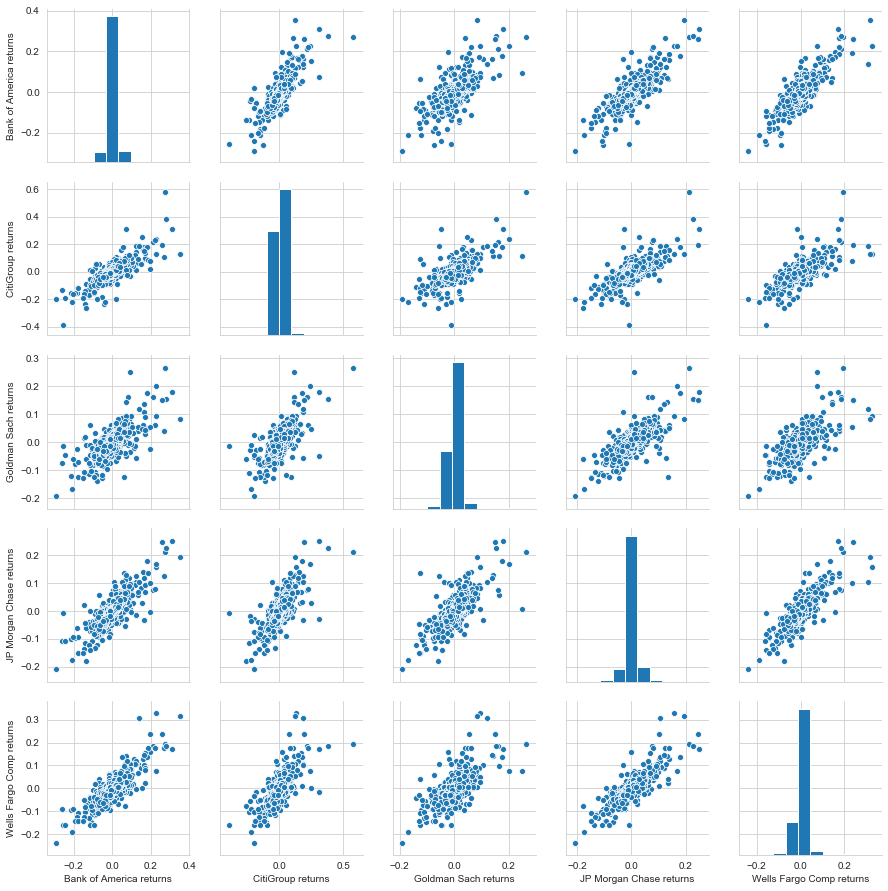

In [93]:
sns.set_style(style='whitegrid')
sns.pairplot(data=bank_AdjClose,kind='scatter')

Each bank's maximum and minimun single day returnsa nd return date

In [122]:
maxmin_return_analysis=pd.DataFrame({'maxdate':bank_AdjClose.idxmax(),'mindate':bank_AdjClose.idxmin(),
                                    'maxreturn':bank_AdjClose.max(),'minreturn':bank_AdjClose.min()},
                                    index=bank_AdjClose.idxmax().index)
maxmin_return_analysis

,maxdate,mindate,maxreturn,minreturn
Bank of America returns,2009-04-09,2009-01-20,0.352691,-0.289694
CitiGroup returns,2008-11-24,2009-02-27,0.578249,-0.390244
Goldman Sach returns,2008-11-24,2009-01-20,0.264678,-0.189596
JP Morgan Chase returns,2009-01-21,2009-01-20,0.250967,-0.207274
Wells Fargo Comp returns,2008-07-16,2009-01-20,0.327645,-0.238223


Analysing the riskiest Stock over the entire period 2006-2020 using **STD**

In [123]:
bank_AdjClose.std()
##CitiGroup

Bank of America returns     0.032720
CitiGroup returns           0.034534
Goldman Sach returns        0.023734
JP Morgan Chase returns     0.025216
Wells Fargo Comp returns    0.027348
dtype: float64

Analysing the riskiest Stock for 2019 using STD

In [147]:
bank_AdjClose1=bank_AdjClose.reset_index(inplace=False)
bank_AdjClose1['Year']=bank_AdjClose1['Date'].apply(lambda x:x.year)
bank_AdjClose1[bank_AdjClose1['Year']==2019].std()[:-1]
##Citigroup

Bank of America returns     0.014591
CitiGroup returns           0.015383
Goldman Sach returns        0.014898
JP Morgan Chase returns     0.011793
Wells Fargo Comp returns    0.012478
dtype: float64

Plotting the distribution of JP Morgan Chase returns for **2019**

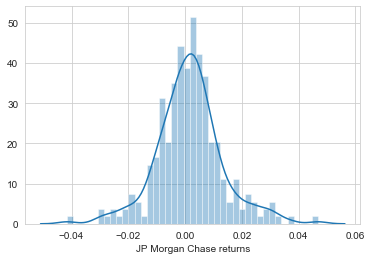

In [151]:
sns.distplot(a=bank_AdjClose1[bank_AdjClose1['Year']==2019]['JP Morgan Chase returns'],bins=41)

Plotting the distribution of Citi Group returns for **2009**

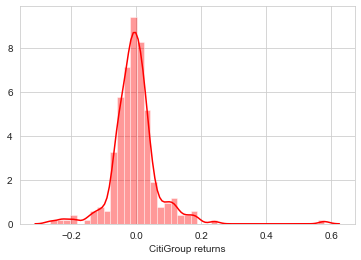

In [155]:
sns.distplot(a=bank_AdjClose1[bank_AdjClose1['Year']==2008]['CitiGroup returns'],bins=41,color='red')

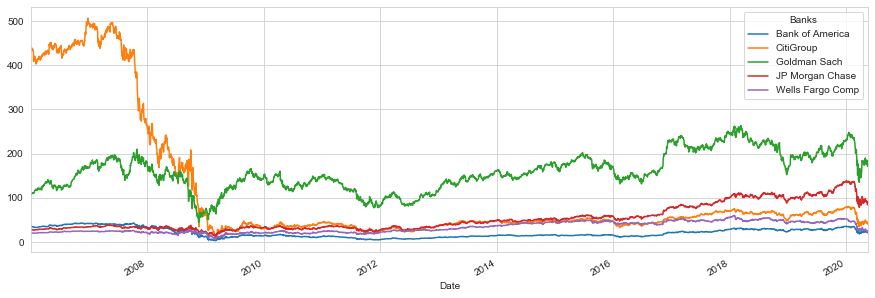

In [159]:
bank_stocks.xs(axis=1,level=1,key='Adj Close').plot.line(figsize=(15,5))

Visualizing stock of Bank of America in 2008 along with rolling mean

In [226]:
bankAdjClose=bank_stocks.xs(axis=1,level=1,key='Adj Close')
bankAdjClose1=bankAdjClose.reset_index(inplace=False)
bankAdjClose1['Year']=bankAdjClose1['Date'].apply(lambda y:y.year)
bankAdjClose2=bankAdjClose1['Bank of America'].rolling(window=31).mean()
bankAdjClose3=bankAdjClose2.reset_index(inplace=False)
bankAdjClose3.columns=['index','BAC rolling mean']
bankAdjClose4=bankAdjClose1.join(bankAdjClose3)

data=bankAdjClose4[bankAdjClose4['Year']==2008]
data.set_index('Date',inplace=True)

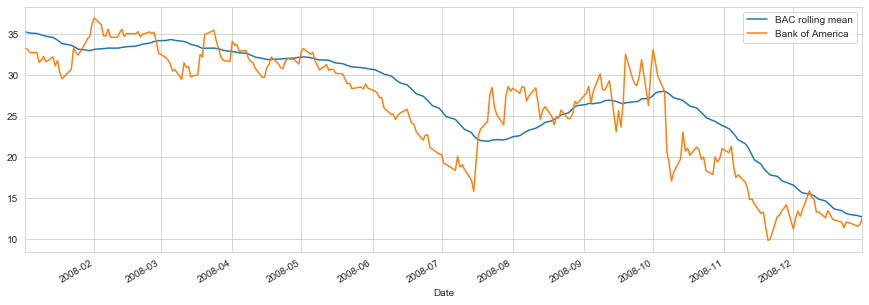

In [231]:
data.plot.line(y=['BAC rolling mean','Bank of America'],figsize=(15,5))

Analysing Closing Stock for each bank through Heat map

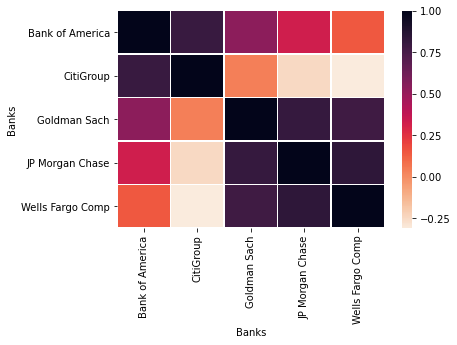

In [6]:
sns.heatmap(data=bank_stocks.xs(axis=1,key='Adj Close',level=1).corr(),cmap='rocket_r',linewidths=.5)

Clustering Closing Stock for each bank

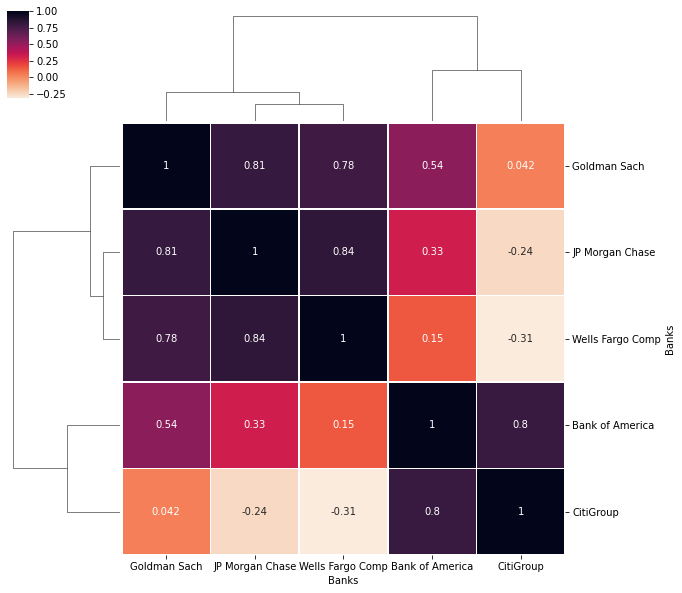

In [9]:
sns.clustermap(data=bank_stocks.xs(axis=1,key='Adj Close',level=1).corr(),cmap='rocket_r',linewidths=.5,annot=True)

**Interactive visualization**

Visualizing Bank of America's stock for 2015

In [12]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

In [61]:
bank_stocks1=bank_stocks.reset_index(inplace=False)
bank_stocks1['Year']=bank_stocks1['Date'].apply(lambda x:x.year)
bank_stocks2=bank_stocks1[bank_stocks1['Year']==2015][['Date','Bank of America','Year']]

bank_stocks2.set_index(keys='Date',inplace=True)
bank_stocks2.drop(labels='Year',axis=1,inplace=True)

bank_stocks2['Bank of America'].iplot(kind='candle',yTitle='stock',xTitle='time',title='Bank Of America')

Visualizing JP Morgan Chase Closing stock for 2019 using simple moving average

In [69]:
bank_stocks3=bank_stocks['JP Morgan Chase']
bank_stocks3.loc['2019-01-01':'2020-01-01']['Adj Close'].ta_plot(study='sma')

Visualizing CitiBank   stock for 2020 so far through CoViD-19

In [72]:
bank_stocks5=bank_stocks['CitiGroup']  
bank_stocks3.loc['2020-01-01':'2020-05-16']['Adj Close'].ta_plot(study='boll')